<a href="https://colab.research.google.com/github/Praneeth-18/Fractal-Clustering/blob/main/Fractal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Previously Known Data Insights
- After cleaning the data we found that it was of the New York Region and we have trips throughout the day.

## Objective
- To find hotspots where prices are high for traveling same distance in comparison to other pickup locations. The goal being better fleet management.

## Business Objective
- To provide better fare prices to customers in this location by increasing the supply of drivers. This might essentially give a competitive edge over the competitors.
-We can use this metric to look for clusters where the fare to haversine ratio is greater than 3.9 which is approximately 30% greater than the average fare to km ratio. (as 3.03 is the point of reference for the calculations)

- https://www.timeout.com/newyork/news/nyc-is-home-to-the-most-expensive-uber-rides-in-the-u-s-071522 as per this article the Average cost for uber in New York is \$34.74 for 6.2 mile, which is equivalent to $3.47 per km, considering a 2% consumer inflation the same would have costed on an average \$3.03 for the year range 2009 to 2015 (Which is the timeline of the available data)

## Objective Function
- First objective function is to find trips with minimum haversine distance.
- Second objective function is to find trips with maximal fare value.
- Based on the two objective fuctions, we define the combined objective function as the ratio of fare price to haversine distance.
- The fare to haversine ratio is nothing but the cost per km.
- We ought to maximize this ratio to find the golden cluster.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the data
import pandas as pd
# Set the display format to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.8f' % x)
data = pd.read_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/uber_clean_preclustering_datetime_split.csv')
data.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0   7.50000000      -73.99981689      40.73835373       -73.99951172   
1   7.70000000      -73.99435500      40.72822500       -73.99471000   
2  12.90000000      -74.00504300      40.74077000       -73.96256500   
3   5.30000000      -73.97612400      40.79084400       -73.96531600   
4  16.00000000      -73.92502300      40.74408500       -73.97308200   

   dropoff_latitude  passenger_count  euclidean_distance        date  \
0       40.72321701       1.00000000          0.01513979  2015-05-07   
1       40.75032500       1.00000000          0.02210285  2009-07-17   
2       40.77264700       1.00000000          0.05310860  2009-08-24   
3       40.80334900       3.00000000          0.01652840  2009-06-26   
4       40.76124700       5.00000000          0.05103138  2014-08-28   

                  time  day_of_week  haversine_distance_km  year  month  day  \
0  1900-01-01 19:52:06            3             1.68332275  2015      5    7   
1  1900-01-01 20:04:56            4             2.45758988  2009      7   17   
2  1900-01-01 21:45:00            0             5.03637719  2009      8   24   
3  1900-01-01 08:22:21            4             1.66168346  2009      6   26   
4  1900-01-01 17:47:00            3             4.47544996  2014      8   28   

   hour  minutes  seconds  
0    19       52        6  
1    20        4       56  
2    21       45        0  
3     8       22       21  
4    17       47        0

In [ ]:
data.shape

(26243, 17)

Dropping columns that we belive shouldn't have much impact to clusters, or those whose datatypes wont be supported by Sklearns implementation of KMeans

In [ ]:
data = data.drop(['date', 'time', 'minutes', 'seconds'] , axis = 1)

## Iteration 1

Performing Clustering on the remaining columns and plotting the elow curve to find the ideal number of clusters.

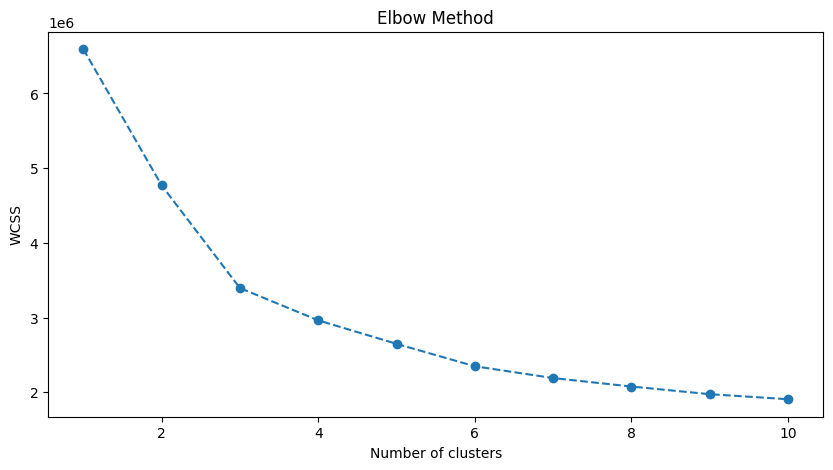

In [ ]:
# GPT-4 Generated
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Calculating WCSS for different number of clusters
wcss = []
for i in range(1, 11):  # Assuming we're testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

The elbow is at K=3, so we will peoceed with perfoming KMeans with k=3

Performing Kmeans on the dataset with K=3, and assigning cluster labels to the dataset

In [ ]:
# GPT4 generated
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Selecting the data for clustering (two columns in this case)
X = data.values

# Assuming you've determined the optimal number of clusters to be k
k = 3  # Example value; replace with the optimal k found using the elbow method

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Assign the cluster labels to each data point
data['cluster_label'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
print(data.head())

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0   7.50000000      -73.99981689      40.73835373       -73.99951172   
1   7.70000000      -73.99435500      40.72822500       -73.99471000   
2  12.90000000      -74.00504300      40.74077000       -73.96256500   
3   5.30000000      -73.97612400      40.79084400       -73.96531600   
4  16.00000000      -73.92502300      40.74408500       -73.97308200   

   dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
0       40.72321701       1.00000000          0.01513979            3   
1       40.75032500       1.00000000          0.02210285            4   
2       40.77264700       1.00000000          0.05310860            0   
3       40.80334900       3.00000000          0.01652840            4   
4       40.76124700       5.00000000          0.05103138            3   

   haversine_distance_km  year  month  day  hour  cluster_label  
0             1.68332275  2015      5    7    19              

In [ ]:
from sklearn.metrics import silhouette_score
#Calculating the SSE and Silhouette score for each cluster
sse = kmeans.inertia_
silhouette_avg = silhouette_score(X, data['cluster_label'])

In [ ]:
print('The Overall SSE',sse)
print('The overall Silhouette score ', silhouette_avg)

The Overall SSE 3395477.405271097
The overall Silhouette score  0.2965873918405986


In [ ]:
#finding the sse for each cluster
clusters_sse = np.zeros(3)
for i in range(3):
  cluster_center = kmeans.cluster_centers_[i]
  filtered_data = data[data['cluster_label']==i]
  cluster_sse = np.sum((filtered_data.drop(['cluster_label'],axis=1).values - cluster_center) ** 2)
  print(f"SSE for Cluster {i}: {cluster_sse}")
  clusters_sse[i] = cluster_sse

SSE for Cluster 0: 1274367.4941969535
SSE for Cluster 1: 791254.8342348591
SSE for Cluster 2: 1329855.0768392826


In [ ]:
data['cluster_label'].value_counts()

2    12261
0    12114
1     1868
Name: cluster_label, dtype: int64

Grouping data by clusters and calculating our objective function for each cluster. The objective function is the ration between fare amount and haversine disatnce, we want to itenify trips where the distance was less but the fare was high, so we are looking clusters with high objective function value

In [ ]:
# GPT Generated

import pandas as pd
import numpy as np

df = pd.DataFrame(data)

# Group data based on 'cluster_label'
grouped = df.groupby('cluster_label')

# Apply aggregating functions to 'column1' and 'column2'
# For instance, calculating mean and sum of these columns for each cluster
aggregated_data = grouped.agg({
    'haversine_distance_km': ['mean'],
    'fare_amount': ['mean']
})
#adding the individual clusters sse score, aggregated data
aggregated_data['cluster_sse'] = clusters_sse
print(aggregated_data)

              haversine_distance_km fare_amount      cluster_sse
                               mean        mean                 
cluster_label                                                   
0                        2.56873151  9.13093776 1274367.49419695
1                       13.11334228 39.76247859  791254.83423486
2                        2.60297167  9.24777832 1329855.07683928


In [ ]:
aggregated_data.columns

MultiIndex([('haversine_distance_km', 'mean'),
            (          'fare_amount', 'mean'),
            (          'cluster_sse',     '')],
           )

In [ ]:
aggregated_data['fare_to_haversine'] = aggregated_data['fare_amount']['mean'] / aggregated_data['haversine_distance_km']['mean']

In [ ]:
print(aggregated_data)

              haversine_distance_km fare_amount      cluster_sse  \
                               mean        mean                    
cluster_label                                                      
0                        2.56873151  9.13093776 1274367.49419695   
1                       13.11334228 39.76247859  791254.83423486   
2                        2.60297167  9.24777832 1329855.07683928   

              fare_to_haversine  
                                 
cluster_label                    
0                    3.55464855  
1                    3.03221541  
2                    3.55277717  


## Iteration 2

In our previous iteration cluster 0 and 2 have roughly the same haversine distance , however cluster 0 has a better SSE score. However for the sake of experimentation we will procees with the data points belonging to cluster 0 and 2 and will try to find the cluster having high fare to haversine ratio and lower SSE score.

In [ ]:
data_1 = data[(data['cluster_label'] == 0) | (data['cluster_label'] == 2)]

In [ ]:
data_1 = data_1.drop('cluster_label', axis = 1)
data_1.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0   7.50000000      -73.99981689      40.73835373       -73.99951172   
1   7.70000000      -73.99435500      40.72822500       -73.99471000   
2  12.90000000      -74.00504300      40.74077000       -73.96256500   
3   5.30000000      -73.97612400      40.79084400       -73.96531600   
4  16.00000000      -73.92502300      40.74408500       -73.97308200   

   dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
0       40.72321701       1.00000000          0.01513979            3   
1       40.75032500       1.00000000          0.02210285            4   
2       40.77264700       1.00000000          0.05310860            0   
3       40.80334900       3.00000000          0.01652840            4   
4       40.76124700       5.00000000          0.05103138            3   

   haversine_distance_km  year  month  day  hour  
0             1.68332275  2015      5    7    19  
1             2.45758988  2009      7   17    20  
2             5.03637719  2009      8   24    21  
3             1.66168346  2009      6   26     8  
4             4.47544996  2014      8   28    17

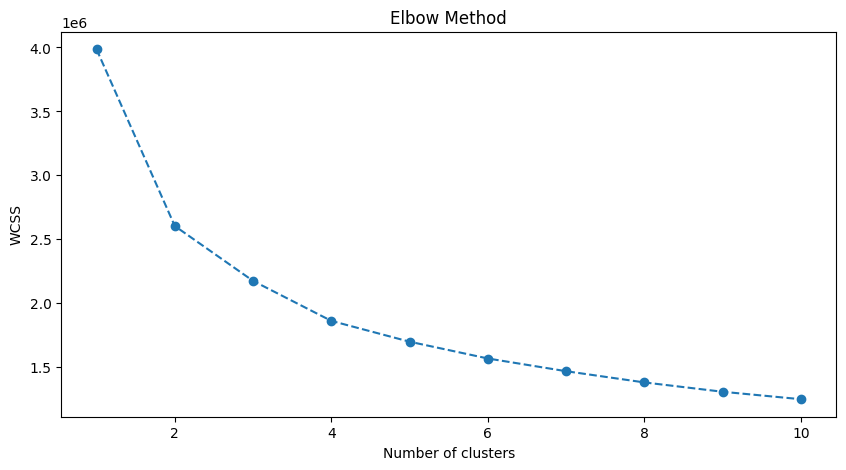

In [ ]:
# GPT-4 Generated
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Calculating WCSS for different number of clusters
wcss = []
for i in range(1, 11):  # Assuming we're testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_1)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

The elbow is forming at 2, but the data we started on was the data belonging to 2 clusters.  Lets try to do that again though

In [ ]:
#fitting a 2 cluster cluster data on the data
kmeans = KMeans(n_clusters= 2,random_state=0)
kmeans.fit(data_1)
# Assign the cluster labels to each data point
data_1['cluster_label'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
sse = kmeans.inertia_
silhouette_avg = silhouette_score(data_1.drop('cluster_label',axis=1).values, data_1['cluster_label'])
print('The Silhouette score is',silhouette_avg)

The Silhouette score is 0.29974907142877993


In [ ]:
#number of records belonging to each cluster
data_1['cluster_label'].value_counts()

1    12261
0    12114
Name: cluster_label, dtype: int64

In [ ]:
#calculating the evaluation metric for each clusters and
# GPT Generated

import pandas as pd
import numpy as np

#finding the sse for each cluster
clusters_sse = np.zeros(2)
for i in range(2):
  cluster_center = kmeans.cluster_centers_[i]
  filtered_data = data_1[data_1['cluster_label']==i]
  cluster_sse = np.sum((filtered_data.drop(['cluster_label'],axis=1).values - cluster_center) ** 2)
  print(f"SSE for Cluster {i}: {cluster_sse}")
  clusters_sse[i] = cluster_sse
# Group data based on 'cluster_label'
grouped = data_1.groupby('cluster_label')

# Apply aggregating functions to 'column1' and 'column2'
# For instance, calculating mean and sum of these columns for each cluster
aggregated_data = grouped.agg({
    'haversine_distance_km': ['mean'],
    'fare_amount': ['mean']
})
#adding the individual clusters sse score, aggregated data
aggregated_data['cluster_sse'] = clusters_sse
#calculating out objective function
aggregated_data['fare_to_haversine'] = aggregated_data['fare_amount']['mean'] / aggregated_data['haversine_distance_km']['mean']
print(aggregated_data)

SSE for Cluster 0: 1274367.4941969533
SSE for Cluster 1: 1329855.0768392826
              haversine_distance_km fare_amount      cluster_sse  \
                               mean        mean                    
cluster_label                                                      
0                        2.56873151  9.13093776 1274367.49419695   
1                        2.60297167  9.24777832 1329855.07683928   

              fare_to_haversine  
                                 
cluster_label                    
0                    3.55464855  
1                    3.55277717  


In [ ]:
aggregated_data

haversine_distance_km fare_amount      cluster_sse  \
                               mean        mean                    
cluster_label                                                      
0                        2.56873151  9.13093776 1274367.49419695   
1                        2.60297167  9.24777832 1329855.07683928   

              fare_to_haversine  
                                 
cluster_label                    
0                    3.55464855  
1                    3.55277717

Just as We saw in the previous iteration that the fare to haversine ratio for both the clusters are almost identical. However Cluster 0 has a better SSE score and a slightly higher fare to haversine ratio, we now we will drill down in cluster 0, in our search for the golden cluster

#Iteration 3  

In [ ]:
#filtering out only the data points belonging to cluster 0
data_2 = data_1[(data_1['cluster_label'] == 0)]
#dropping the cluster label from the data frams as we know all them b
data_2 = data_2.drop('cluster_label', axis = 1)
data_2.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0    7.50000000      -73.99981689      40.73835373       -73.99951172   
5    4.90000000      -73.96901900      40.75591000       -73.96901900   
12   6.90000000      -73.97337000      40.75519300       -73.97826500   
14   4.90000000      -73.98890800      40.75698200       -73.98124600   
17   4.90000000      -73.99207500      40.71963300       -73.98532300   

    dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
0        40.72321701       1.00000000          0.01513979            3   
5        40.75591000       1.00000000          0.00000000            5   
12       40.76637500       1.00000000          0.01220648            1   
14       40.76005000       1.00000000          0.00825342            3   
17       40.72740500       1.00000000          0.01029531            5   

    haversine_distance_km  year  month  day  hour  
0              1.68332275  2015      5    7    19  
5              0.00000000  2011      2   12     2  
12             1.30994990  2010      4    6    22  
14             0.72996555  2011      9    1     9  
17             1.03470361  2009      8    8     0

In [ ]:
data_2.shape

(12114, 13)

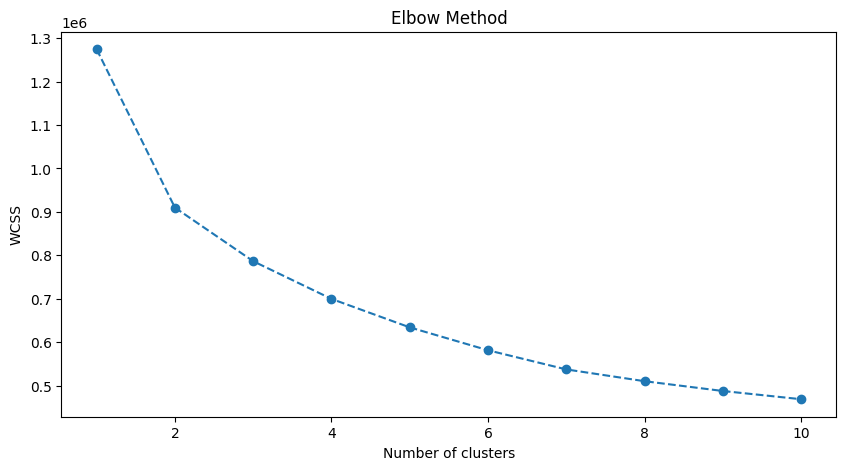

In [ ]:
# GPT-4 Generated
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Calculating WCSS for different number of clusters
wcss = []
for i in range(1, 11):  # Assuming we're testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_2)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

The elbow is at k=2

In [ ]:
#fitting a 2 cluster cluster data on the data
kmeans = KMeans(n_clusters= 2,random_state=0)
kmeans.fit(data_2)
# Assign the cluster labels to each data point
data_2['cluster_label'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
sse = kmeans.inertia_
silhouette_avg = silhouette_score(data_2.drop('cluster_label',axis=1).values, data_2['cluster_label'])
print('The Silhouette score is',silhouette_avg)

The Silhouette score is 0.2543744463842375


In [ ]:
#calculating the evaluation metric for each clusters and
# GPT Generated

import pandas as pd
import numpy as np

#finding the sse for each cluster
clusters_sse = np.zeros(2)
for i in range(2):
  cluster_center = kmeans.cluster_centers_[i]
  filtered_data = data_2[data_2['cluster_label']==i]
  cluster_sse = np.sum((filtered_data.drop(['cluster_label'],axis=1).values - cluster_center) ** 2)
  print(f"SSE for Cluster {i}: {cluster_sse}")
  clusters_sse[i] = cluster_sse
# Group data based on 'cluster_label'
grouped = data_2.groupby('cluster_label')

# Apply aggregating functions to 'column1' and 'column2'
# For instance, calculating mean and sum of these columns for each cluster
aggregated_data = grouped.agg({
    'haversine_distance_km': ['mean'],
    'fare_amount': ['mean']
})
#adding the individual clusters sse score, aggregated data
aggregated_data['cluster_sse'] = clusters_sse
#calculating out objective function
aggregated_data['fare_to_haversine'] = aggregated_data['fare_amount']['mean'] / aggregated_data['haversine_distance_km']['mean']
aggregated_data.head()

SSE for Cluster 0: 504713.5590795868
SSE for Cluster 1: 405130.80941754393


haversine_distance_km fare_amount     cluster_sse  \
                               mean        mean                   
cluster_label                                                     
0                        2.53541977  9.13543454 504713.55907959   
1                        2.61498177  9.12469440 405130.80941754   

              fare_to_haversine  
                                 
cluster_label                    
0                    3.60312507  
1                    3.48939121

We can see that cluster 0 has a higher haversine ratio, let us drill down it to for our golden cluster

# Iteration 4

In [ ]:
#filtering out only the data points belonging to cluster 0
data_3 = data_2[(data_2['cluster_label'] == 0)].copy()
#dropping the cluster label
data_3=data_3.drop('cluster_label',axis=1)
data_3.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0    7.50000000      -73.99981689      40.73835373       -73.99951172   
12   6.90000000      -73.97337000      40.75519300       -73.97826500   
19   5.00000000      -73.98918915      40.72914124       -73.98728180   
21   7.70000000      -73.99430000      40.73951200       -73.98807000   
22  12.90000000      -73.97298700      40.76404000       -74.00782000   

    dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
0        40.72321701       1.00000000          0.01513979            3   
12       40.76637500       1.00000000          0.01220648            1   
19       40.72063446       2.00000000          0.00871798            1   
21       40.72448200       2.00000000          0.01627003            5   
22       40.71499300       5.00000000          0.06015768            2   

    haversine_distance_km  year  month  day  hour  
0              1.68332275  2015      5    7    19  
12             1.30994990  2010      4    6    22  
19             0.95946886  2015      3    3    23  
21             1.75176258  2010      9    4    16  
22             6.19323595  2010      5   12    22

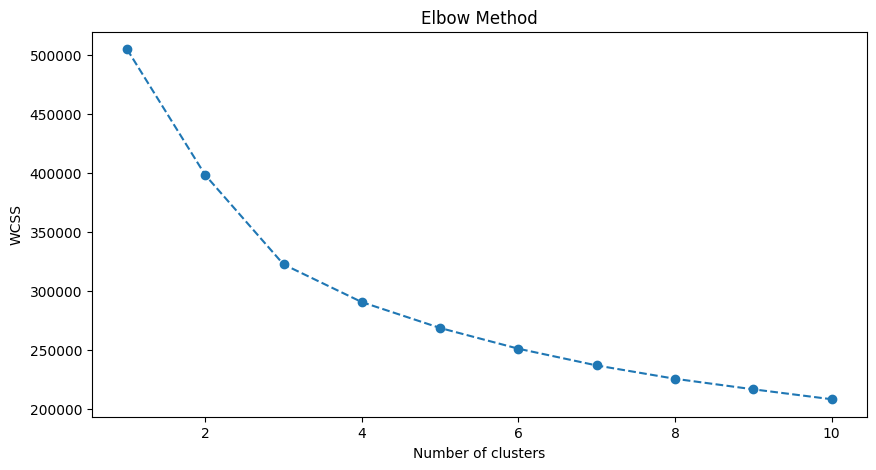

In [ ]:
# GPT-4 Generated
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Calculating WCSS for different number of clusters
wcss = []
for i in range(1, 11):  # Assuming we're testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_3)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

Elbow at k=3

In [ ]:
#fitting a 3 cluster cluster data on the data
kmeans = KMeans(n_clusters= 3,random_state=0)
kmeans.fit(data_3)
# Assign the cluster labels to each data point
data_3['cluster_label'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(3, 13)

In [ ]:
from sklearn.metrics import silhouette_score
sse = kmeans.inertia_
silhouette_avg = silhouette_score(data_3.drop('cluster_label',axis=1).values, data_3['cluster_label'])
print('The Silhouette score is',silhouette_avg)

The Silhouette score is 0.20338955135378245


In [ ]:
data_3['cluster_label'].value_counts()

1    2927
0    2701
2    1414
Name: cluster_label, dtype: int64

In [ ]:
#calculating the evaluation metric for each clusters and
# GPT Generated

import pandas as pd
import numpy as np

#finding the sse for each cluster
clusters_sse = np.zeros(3)
for i in range(3):
  cluster_center = kmeans.cluster_centers_[i]
  filtered_data = data_3[data_3['cluster_label']==i]
  cluster_sse = np.sum((filtered_data.drop(['cluster_label'],axis=1).values - cluster_center) ** 2)
  print(f"SSE for Cluster {i}: {cluster_sse}")
  clusters_sse[i] = cluster_sse
# Group data based on 'cluster_label'
grouped = data_3.groupby('cluster_label')

# Apply aggregating functions to 'column1' and 'column2'
# For instance, calculating mean and sum of these columns for each cluster
aggregated_data = grouped.agg({
    'haversine_distance_km': ['mean'],
    'fare_amount': ['mean']
})
#adding the individual clusters sse score, aggregated data
aggregated_data['cluster_sse'] = clusters_sse
#calculating out objective function
aggregated_data['fare_to_haversine'] = aggregated_data['fare_amount']['mean'] / aggregated_data['haversine_distance_km']['mean']
aggregated_data.head()

SSE for Cluster 0: 111568.03011263686
SSE for Cluster 1: 123618.80214673068
SSE for Cluster 2: 87168.61680043885


haversine_distance_km fare_amount     cluster_sse  \
                               mean        mean                   
cluster_label                                                     
0                        1.86897959  7.31429100 111568.03011264   
1                        1.88380927  7.37293133 123618.80214673   
2                        5.15728602 16.26256011  87168.61680044   

              fare_to_haversine  
                                 
cluster_label                    
0                    3.91352107  
1                    3.91384173  
2                    3.15331747

In [ ]:
data_3['cluster_label'].value_counts()

1    2927
0    2701
2    1414
Name: cluster_label, dtype: int64

Cluster 1 have a fare to haversine ratio closer to our targrt

# Iteration 5

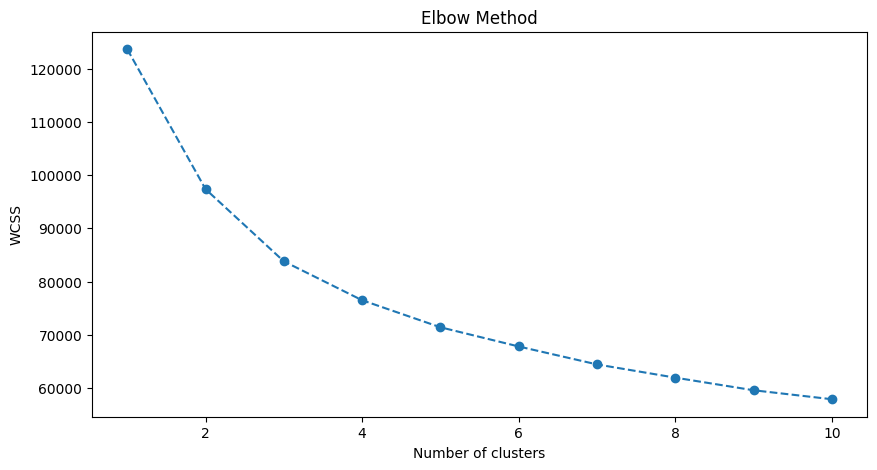

In [ ]:
#filtering out only the data points belonging to cluster 0
data_4 = data_3[(data_3['cluster_label'] == 1)].copy()
#dropping the cluster label
data_4=data_4.drop('cluster_label',axis=1)
data_4.head()
# GPT-4 Generated
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Calculating WCSS for different number of clusters
wcss = []
for i in range(1, 11):  # Assuming we're testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_4)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

elbow at k=2

In [ ]:
#fitting a 3 cluster cluster data on the data
kmeans = KMeans(n_clusters= 2,random_state=0)
kmeans.fit(data_4)
# Assign the cluster labels to each data point
data_4['cluster_label'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
sse = kmeans.inertia_
silhouette_avg = silhouette_score(data_4.drop('cluster_label',axis=1).values, data_4['cluster_label'])
print('The Silhouette score is',silhouette_avg)

The Silhouette score is 0.19571263995144217


In [ ]:
#calculating the evaluation metric for each clusters and
# GPT Generated

import pandas as pd
import numpy as np

#finding the sse for each cluster
k=2
clusters_sse = np.zeros(k)
for i in range(k):
  cluster_center = kmeans.cluster_centers_[i]
  filtered_data = data_4[data_4['cluster_label']==i]
  cluster_sse = np.sum((filtered_data.drop(['cluster_label'],axis=1).values - cluster_center) ** 2)
  print(f"SSE for Cluster {i}: {cluster_sse}")
  clusters_sse[i] = cluster_sse
# Group data based on 'cluster_label'
grouped = data_4.groupby('cluster_label')

# Apply aggregating functions to 'column1' and 'column2'
# For instance, calculating mean and sum of these columns for each cluster
aggregated_data = grouped.agg({
    'haversine_distance_km': ['mean'],
    'fare_amount': ['mean']
})
#adding the individual clusters sse score, aggregated data
aggregated_data['cluster_sse'] = clusters_sse
#calculating out objective function
aggregated_data['fare_to_haversine'] = aggregated_data['fare_amount']['mean'] / aggregated_data['haversine_distance_km']['mean']
aggregated_data.head()

SSE for Cluster 0: 55252.97222069587
SSE for Cluster 1: 42108.05922349458


haversine_distance_km fare_amount    cluster_sse  \
                               mean        mean                  
cluster_label                                                    
0                        1.91888407  7.40571253 55252.97222070   
1                        1.83985100  7.33184758 42108.05922349   

              fare_to_haversine  
                                 
cluster_label                    
0                    3.85938506  
1                    3.98502247

In [ ]:
data_4['cluster_label'].value_counts()

0    1628
1    1299
Name: cluster_label, dtype: int64

Cluster 1, is our golden cluster, as we have reached fare to haversine ration which matched our objetctve function, to find rides which are 30% more expensive then the average.

## Analyzing the golden cluster

In [ ]:
gc = data_4[data_4['cluster_label']==1].copy()
gc.drop('cluster_label',axis=1)

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
21      7.70000000      -73.99430000      40.73951200       -73.98807000   
48      7.70000000      -73.98305200      40.77605500       -73.97409300   
92      4.50000000      -73.99005500      40.75641300       -73.98304700   
101     8.00000000      -73.98446300      40.74279200       -73.97735000   
120     9.70000000      -73.95479700      40.76728900       -73.97478800   
...            ...               ...              ...                ...   
26137   5.50000000      -73.98542500      40.73722200       -73.99148500   
26158   5.70000000      -73.96549800      40.68650200       -73.95674500   
26201   6.50000000      -73.96862600      40.79935700       -73.95545300   
26211   8.50000000      -73.99496700      40.74516400       -73.98736400   
26238   4.50000000      -73.98700700      40.74544000       -73.98032000   

       dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
21          40.72448200       2.00000000          0.01627003            5   
48          40.76379700       1.00000000          0.01518296            5   
92          40.75672700       3.00000000          0.00701503            0   
101         40.76137500       5.00000000          0.01989781            1   
120         40.75488800       1.00000000          0.02352498            2   
...                 ...              ...                 ...          ...   
26137       40.72720200       1.00000000          0.01171000            2   
26158       40.67699300       1.00000000          0.01292424            4   
26201       40.80432300       1.00000000          0.01407796            3   
26211       40.77089800       1.00000000          0.02683364            6   
26238       40.74859700       1.00000000          0.00739477            1   

       haversine_distance_km  year  month  day  hour  
21                1.75176258  2010      9    4    16  
48                1.55789870  2009     10    3    18  
92                0.59130897  2011     10    3    20  
101               2.15144984  2012     12    4    22  
120               2.17630836  2011      7    6    17  
...                      ...   ...    ...  ...   ...  
26137             1.22560581  2012     10    3    16  
26158             1.28948266  2011      7    1    22  
26201             1.23868528  2014      9    4    23  
26211             2.93227083  2012     12    2    20  
26238             0.66374761  2010      9    7    16  

[1299 rows x 13 columns]

In [ ]:
gc.to_csv('/content/drive/MyDrive/ML-Spring-2024/team-Pi/Data/golden_cluster_after_fractal_clustering.csv',index =False)

In [ ]:
gc.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
21    7.70000000      -73.99430000      40.73951200       -73.98807000   
48    7.70000000      -73.98305200      40.77605500       -73.97409300   
92    4.50000000      -73.99005500      40.75641300       -73.98304700   
101   8.00000000      -73.98446300      40.74279200       -73.97735000   
120   9.70000000      -73.95479700      40.76728900       -73.97478800   

     dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
21        40.72448200       2.00000000          0.01627003            5   
48        40.76379700       1.00000000          0.01518296            5   
92        40.75672700       3.00000000          0.00701503            0   
101       40.76137500       5.00000000          0.01989781            1   
120       40.75488800       1.00000000          0.02352498            2   

     haversine_distance_km  year  month  day  hour  cluster_label  
21              1.75176258  2010      9    4    16              1  
48              1.55789870  2009     10    3    18              1  
92              0.59130897  2011     10    3    20              1  
101             2.15144984  2012     12    4    22              1  
120             2.17630836  2011      7    6    17              1

In [ ]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 49.7 MB/s eta 0:00:00


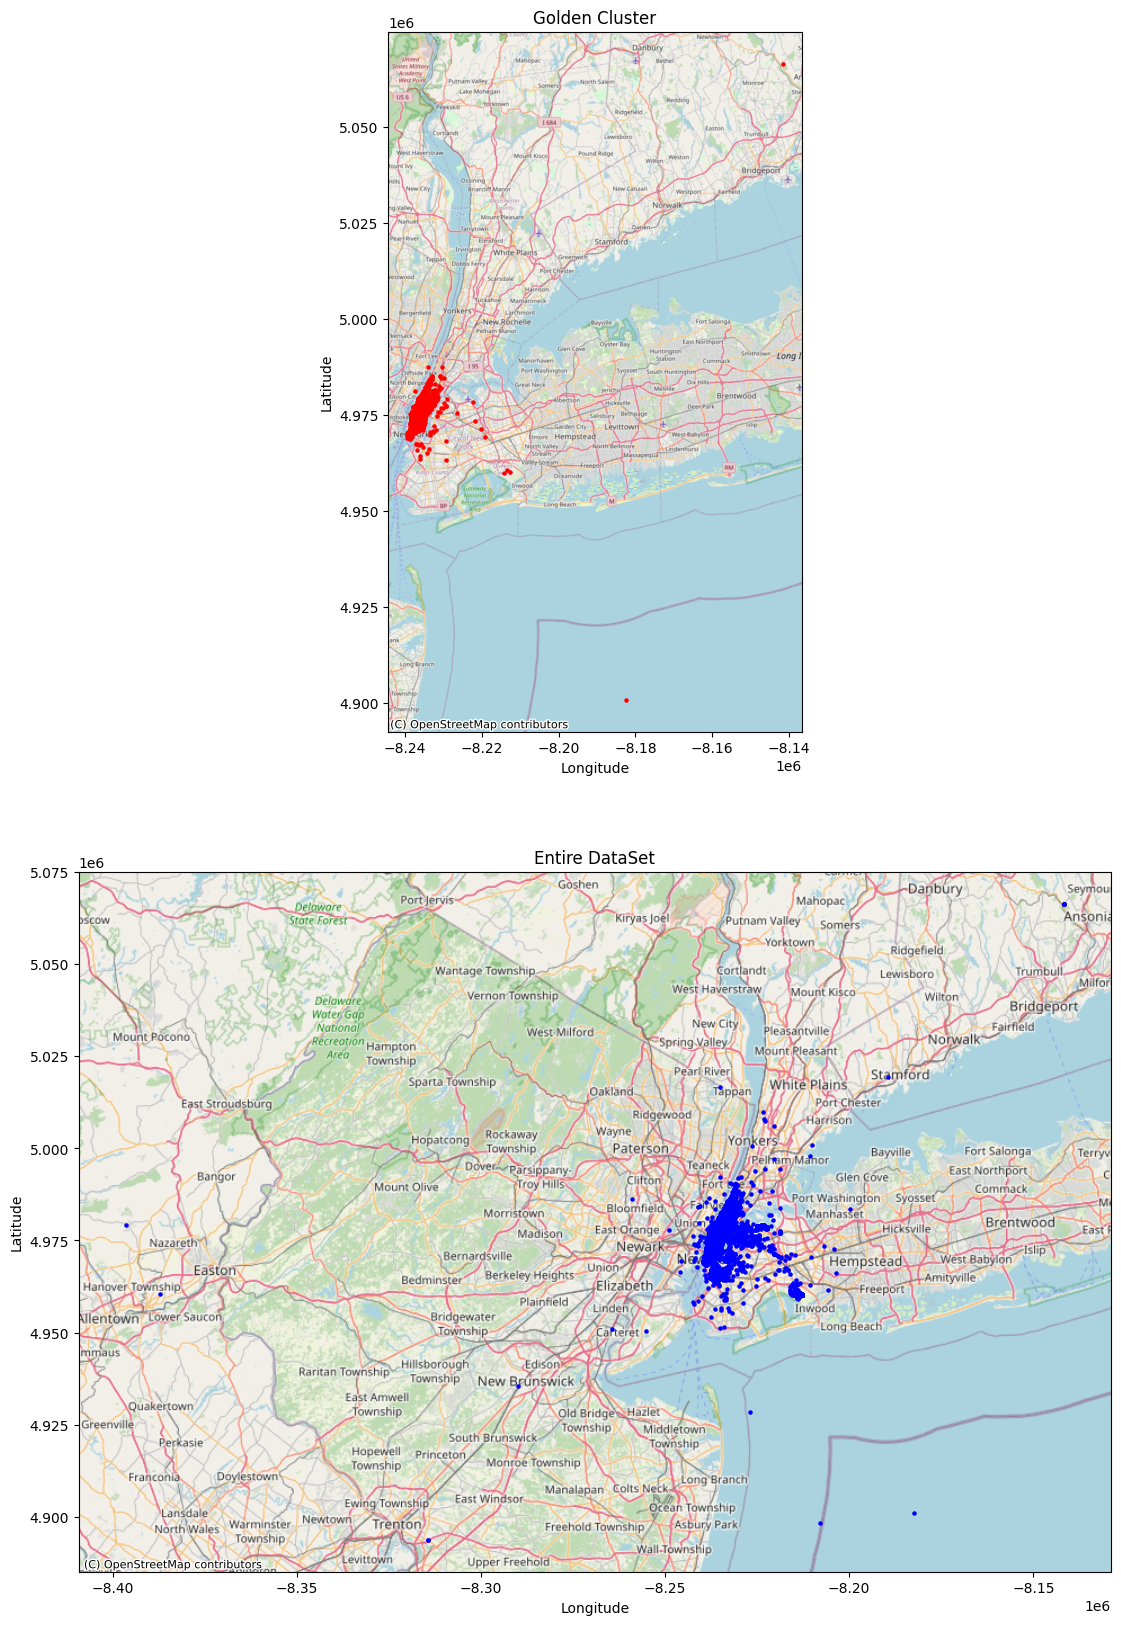

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convert the dataframes to GeoDataFrames
gdf1 = gpd.GeoDataFrame(gc, geometry=gpd.points_from_xy(gc.pickup_longitude, gc.pickup_latitude))
gdf2 = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.pickup_longitude, data.pickup_latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf1.crs = 'epsg:4326'
gdf2.crs = 'epsg:4326'

# Convert the CRS to Web Mercator for compatibility with contextily basemap
gdf1 = gdf1.to_crs(epsg=3857)
gdf2 = gdf2.to_crs(epsg=3857)

# Plot the maps side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20))

# Plot the first graph
gdf1.plot(ax=ax1, color='red', markersize=5)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
ax1.set_title('Golden Cluster')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_axis_on()

# Plot the second graph

gdf2.plot(ax=ax2, color='blue', markersize=5)
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
ax2.set_title('Entire DataSet')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_axis_on()

plt.show()

In [ ]:
gc['hour'].value_counts().sort_index()

13    112
14    122
15     96
16    100
17    137
18    127
19    155
20    138
21    110
22    104
23     98
Name: hour, dtype: int64

According to the data the fare increase above the desired range from 1 pm to 11pm so we can increase the number of vehicle over there just during that time

Our Golden cluster has 3-4 areas of interest , however as we see on the map, there is one ares which of much signifcant interest then the other once, we can now used densoty based clustering to drill down on this single area , for some analysis

The main areas of interest i.e our golden cluster is the city of Manhattan with some parts of clusters being in other part of New York, we can use a density based clustering to get rid of those points, so that we can focus just on manhattan data

In [ ]:
#generated using chat gpt
from sklearn.cluster import DBSCAN
# Convert latitude and longitude to radians
coords = np.radians(gc[['pickup_latitude', 'pickup_longitude']])

# Set the parameters for DBSCAN, found through try and error
kms_per_radian = 6371.0088
epsilon = 0.6 / kms_per_radian  # 0.6 km radius for neighborhood
min_samples = 5

# Fit the DBSCAN model
db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
gc['cluster'] = db.fit_predict(coords)

# Filter out the outliers (cluster = -1)
filtered_df = gc[gc['cluster'] != -1]

print(filtered_df)


       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
21      7.70000000      -73.99430000      40.73951200       -73.98807000   
48      7.70000000      -73.98305200      40.77605500       -73.97409300   
92      4.50000000      -73.99005500      40.75641300       -73.98304700   
101     8.00000000      -73.98446300      40.74279200       -73.97735000   
120     9.70000000      -73.95479700      40.76728900       -73.97478800   
...            ...               ...              ...                ...   
26136   6.50000000      -73.94672400      40.78442800       -73.96443600   
26137   5.50000000      -73.98542500      40.73722200       -73.99148500   
26201   6.50000000      -73.96862600      40.79935700       -73.95545300   
26211   8.50000000      -73.99496700      40.74516400       -73.98736400   
26238   4.50000000      -73.98700700      40.74544000       -73.98032000   

       dropoff_latitude  passenger_count  euclidean_distance  day_of_week  \
21        

In [ ]:
#computing the fare to haversine_distance for this
#the value of our performance metric after applying density based clustering on our Goldeb cluter to remove some outliers
filtered_df['fare_amount'].sum()/filtered_df['haversine_distance_km'].sum()

3.9614149565236496

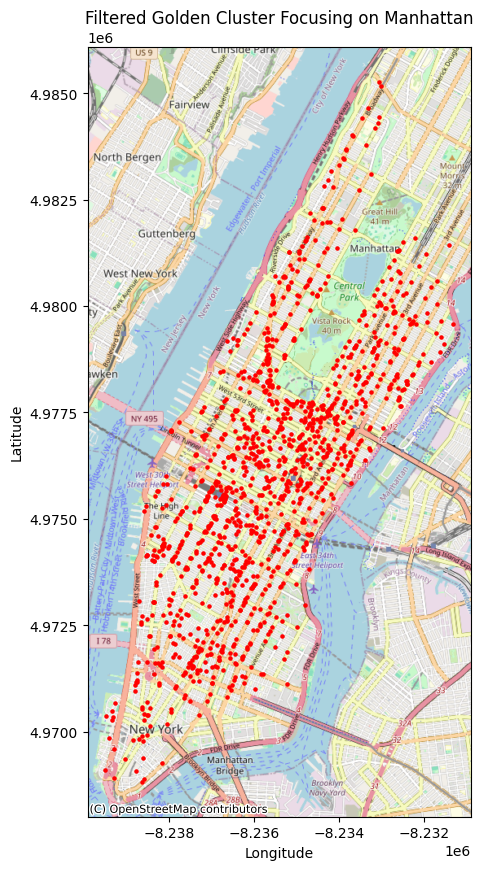

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convert the dataframes to GeoDataFrames
gdf1 = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.pickup_longitude, filtered_df.pickup_latitude))

# Set the coordinate reference system (CRS) to WGS84
gdf1.crs = 'epsg:4326'

# Convert the CRS to Web Mercator for compatibility with contextily basemap
gdf1 = gdf1.to_crs(epsg=3857)


fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))

# Plot the first graph
gdf1.plot(ax=ax1, color='red', markersize=5)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
ax1.set_title('Filtered Golden Cluster Focusing on Manhattan')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_axis_on()


plt.show()

Now within in this filtered golden cluster, let us find the distance between 2 points that are completely opposite of each other

In [ ]:
from scipy.spatial.distance import pdist, squareform
from math import radians


# Vectorized Haversine function
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Calculate all pairwise distances
coords = filtered_df[['pickup_longitude', 'pickup_latitude']].values
distances = pdist(coords, metric=lambda u, v: haversine_np(u[0], u[1], v[0], v[1]))

# Find the maximum distance
max_distance = np.max(distances)

# Find the indices of the points that are furthest apart
i, j = np.unravel_index(np.argmax(distances), (len(filtered_df), len(filtered_df)))

point1 = (filtered_df.iloc[i]['pickup_latitude'], filtered_df.iloc[i]['pickup_longitude'])
point2 = (filtered_df.iloc[j]['pickup_latitude'], filtered_df.iloc[j]['pickup_longitude'])

print(f"The furthest distance is {max_distance:.2f} km between points {point1} and {point2}")

The furthest distance is 13.25 km between points (40.728595, -73.99529) and (40.76181, -73.96644)


So the length of our are of interst is 13.25km which is a descent number and not a really large area for us to focus on.

As this are is not that big, lets see what the average , distance of trips in this area (our cluster)

In [ ]:
np.average(filtered_df['haversine_distance_km'])

1.8488686694986671

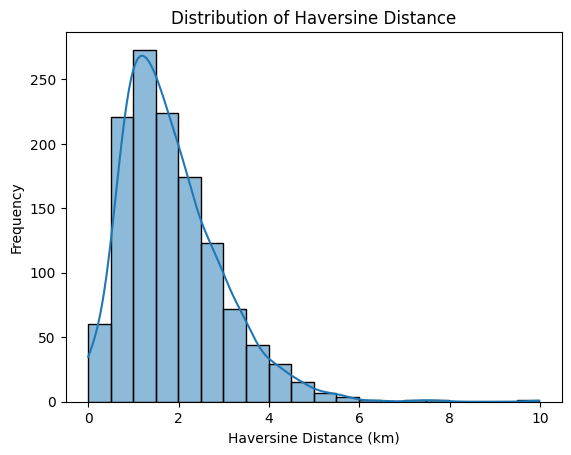

In [ ]:
#lets look at the distribution
import seaborn as sns
sns.histplot(filtered_df['haversine_distance_km'], kde=True, bins=20)
plt.xlabel('Haversine Distance (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Haversine Distance')
plt.show()


The average trip distance in the cluster is 1.8 km, which not very long, and if we look at the distribution of the ride distance, we seee that there are very few rides that are more than 4 km in distance

Now this is interesting to us , as this analysis helps us with 2 more things, that the buisness can do to improve its market share.
First as the rides in this clustered are very dense it can use this data to find our routes where it can offer ride sharing offers, if it doesn't want to increase fleet size.

Secondly as the distance of trips in this cluster is relatively short,it can decide to open a bike pick up center (like lime bikes), to enter compete with it's competitors in another segment and try to gain market share in that side

# **Conclusion**

When we look at the Uber rides data side by side - the overall city's rides and those in hotspots - we see two different stories. The original data (data) shows a clear pattern of ride distribution across the 24 hours. The number of rides gradually increases from the early hours of the morning, peaking during the evening hours. The highest number of rides occurs in the late evening (19:00 - 19:59), followed by a gradual decrease throughout the night.

Now, when we zoom into hotspots according to the Golden Cluster that we obtained after removing all the noise, things get interesting. Although we would expect the busiest time to be in the early morning when most people leave for their offices, here, the busy time starts a bit later, around lunchtime, and doesn't slow down until midnight, with the biggest rush hour at 7 PM. The hotspot data (gc - Golden Cluster) indicates that the activity in these areas is concentrated in the later part of the day, specifically from 13:00 to 23:00.

This suggests that hotspots are more active during the afternoon and evening hours. The peak activity within hotspots occurs at 19:00, indicating a higher demand for Uber rides in these hotspots during the evening. This tells us that hotspots are likely tied to after-work hours or depending on the evening events. Knowing exactly when and where to add more cars to keep up with the crowd demand looking to move around in these hotspot areas is the key takeaway.

In addition to to the vehicular aspect, when we look at the the golden clusters on a map, we can see that there are 3 to 4 areas of interst, however one area (Manhattan one) is of a much bigger in size than compared to other area, we decide to just focus on that and explore it further.  This area is roughly 12km in size, where majority of rides are under 4km.

This information can now further be used by the company to find route that will be eligible for ride sharing, this could be one of the way it could manage the fleet.

Additionally as the ride distance in the Manhattan Cluster is short, it can easily be cycled, the company can also decide to set up a bike stations, to increase its market share in another segment.





# Write Up

**What are the 2-3 main questions that your project is trying to answer?**

1. Locations where we need to increase the number of serving vehicles, to offer rides at a competitive price, to increase market share and customer satisfaction. - clustering

2. What are locations that would be suitable for the installation of new bike stations?

3. Demand forecasting : How many rides are expected on a particular day - regression


4. To promote ride-sharing → classify if a route is eligible to be added for ride sharing



**Business task?**
1. Optimum utilization of resources in order to meet the demand by forecasting the expected number of rides and notifying the drivers about the high demand prone regions.
2. By promoting ride-sharing, Uber can contribute to reducing traffic congestion as well as lowering carbon emission, as customers would be more aligned towards the sustainable travel options.


**ML Task**

1. Clustering to find out the hotspots where there is a requirement for assigning more drivers
2. Denisty Based clustering on latitude longitude to focus on separate physical locations identified above
3. Regression to forecast the number of rides on a day in near future to possibly offer promo codes in case the forecasted demand is low.
4. Classification is to be done if a particular ride can accommodate more people traveling to and from the same locations.


**EDAV**
Key Findings:
1. The data has 9 features, with not many missing values.  
2. The datasets have pick-up locations in 5 different countries, however out of them about 99% of the records belong to just 1 country.
3. There are records where the pick up and drop country, this cannot be possible, so we treat it as faulty readings and drop those records
4. When looking at the cleaned data, all the records belong to New York City
5. Feature engineering to be performed to come up with new feature such as Euclidean distance and Haversine distance between the pick up and destination location.




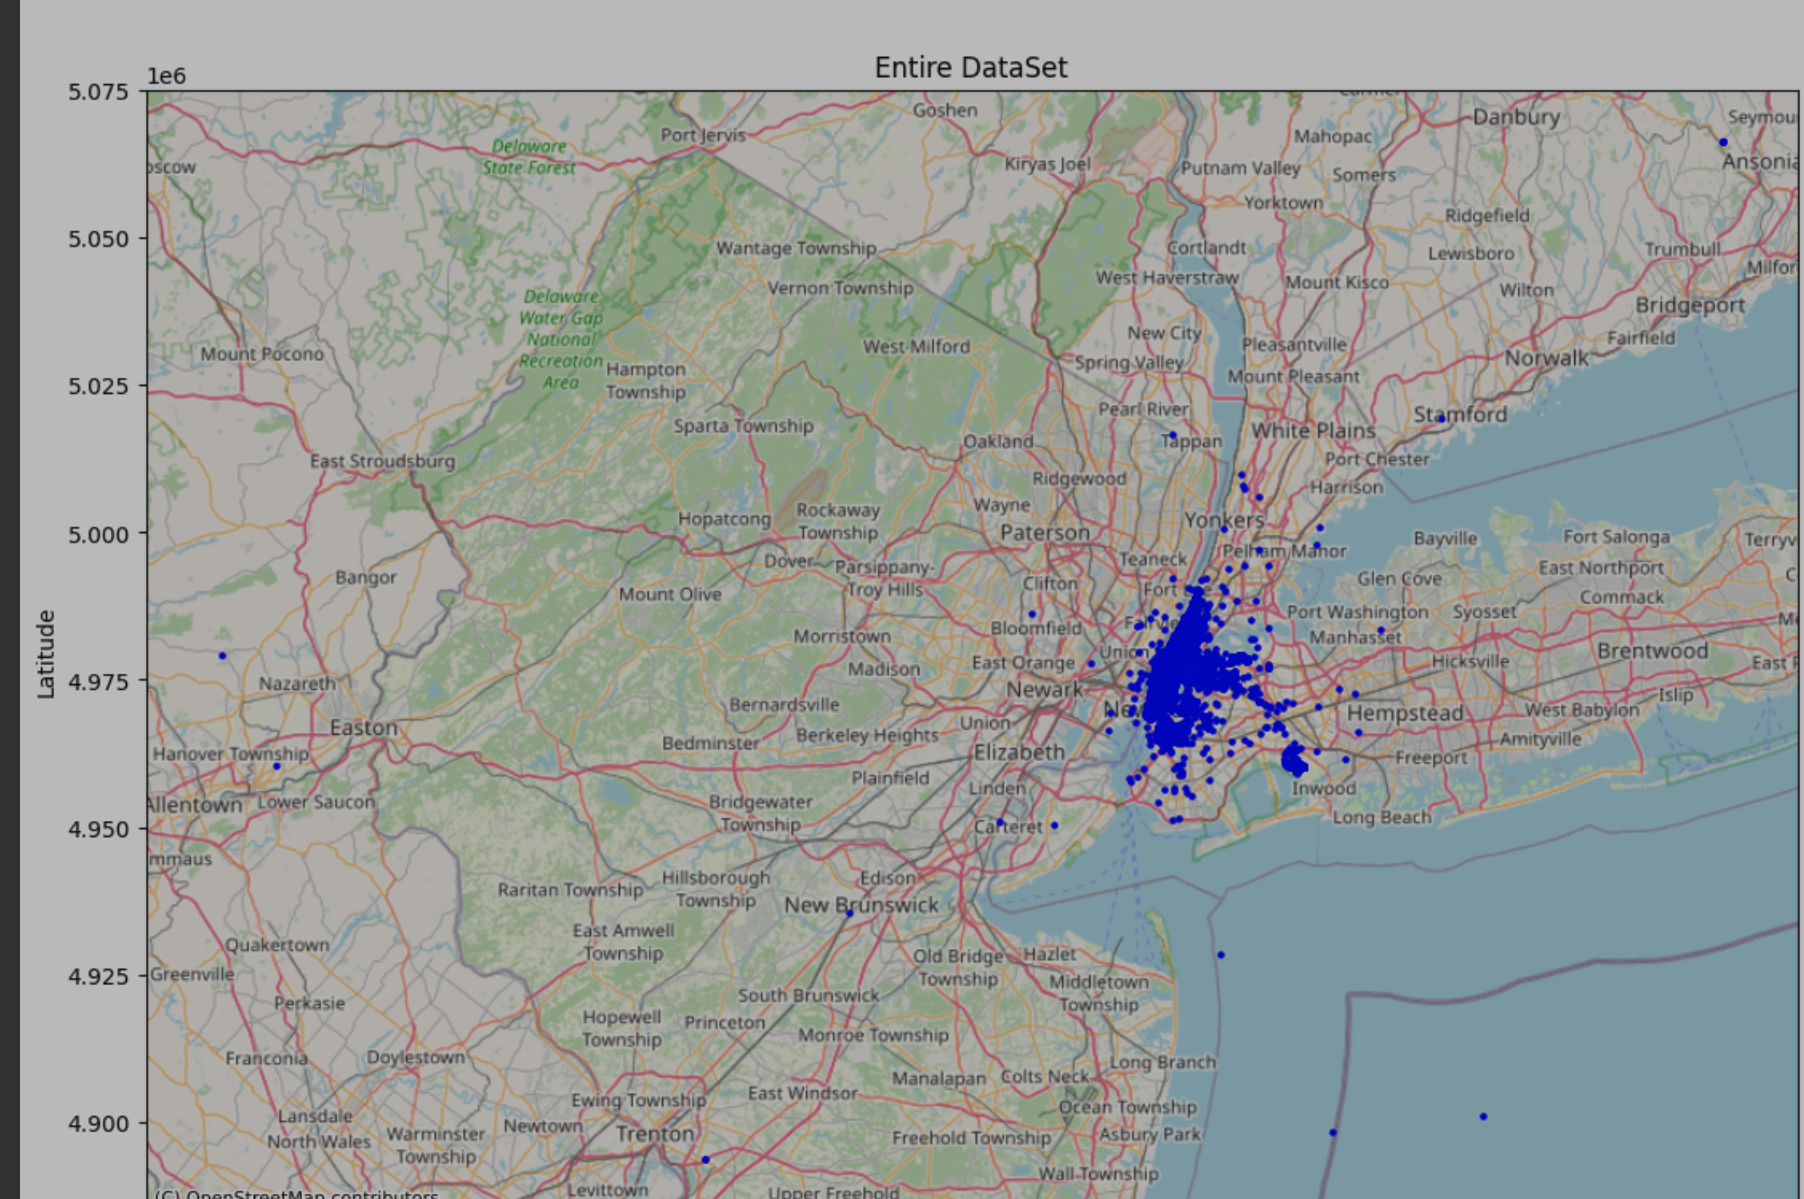# Write Up

Dataset by scraping Uber: Uber provides an API to access its data programmatically, which also includes the rides data so we might use it to scrape data specific to our requirements.